#  Nairobi Hospital Hypothyroidism 

## 1. Defining the question 

### a) Specifying the question 

We would like to predict whether or not someone has hypothyroidism given their test results and their lifestyle/synmptoms. 

### b) Defining the metrics fro success

We would consider a model with a RMSE score of less that 0.5 to be a good model that can be used to best predict hypothyroidism

### c) Understading the context 

Hypothyroidism is a condition where your thyroid glands do not produce enough hormones. We can test for this using the FTI test that shows the amount of hormones (T3,TT4,TBG,TSH,T4U) and gives the result. We intend to look at these and see if we can get 

### d) Recording the experimental design 

For this dataset we will use the following steps to achieve our goal: 
1.   Read the dataset 
2.  Check the dataset 
1.  Clean the dataset 
2.  Conduct Exploratory Analysis 
1.  Importing and using our model  
2.   Challenge our model 









## Reading the data 

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
# Reading the data in pandas 
missing_values = ['NaN','Nan','?']
df = pd.read_csv('/content/hypothyroid.csv',na_values=missing_values)

## Checking the data 

In [3]:
# Checking the top of our dataset
df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [4]:
# Checking the bottom of the dataset 
df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,NaN
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,NaN
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,NaN
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,NaN
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,NaN


In [5]:
# Checking the shape of the dataset
df.shape

(3163, 26)

In [6]:
# Checking the data types of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        2717 non-null   float64
 2   sex                        3090 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

## Cleaning the dataset

#### Further data cleaning 

In [7]:
# Checking if there are missing values 
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [8]:
# Dealing with the missing data
df['age']=df['age'].fillna(0)
df['sex']=df['sex'].fillna('Unknown')

In [9]:
df['TSH'] = df['TSH'].fillna(df['TSH'].mean())
df['T3'] = df['T3'].fillna(df['T3'].mean())
df['TT4'] = df['TT4'].fillna(df['TT4'].mean())
df['T4U'] = df['T4U'].fillna(df['T4U'].mean())
df['FTI'] = df['FTI'].fillna(df['FTI'].mean())
df['TBG'] = df['TBG'].fillna(df['TBG'].mean())

In [10]:
# Confirming there is no more missing data 
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [11]:
# Checking if all the data has the correct data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   object 
 3   on_thyroxine               3163 non-null   object 
 4   query_on_thyroxine         3163 non-null   object 
 5   on_antithyroid_medication  3163 non-null   object 
 6   thyroid_surgery            3163 non-null   object 
 7   query_hypothyroid          3163 non-null   object 
 8   query_hyperthyroid         3163 non-null   object 
 9   pregnant                   3163 non-null   object 
 10  sick                       3163 non-null   object 
 11  tumor                      3163 non-null   object 
 12  lithium                    3163 non-null   object 
 13  goitre                     3163 non-null   objec

In [12]:
# Changing the numeric datatypes to integers
df['age'] = pd.to_numeric(df['age'])
df['TSH'] = pd.to_numeric(df['TSH'])
df['T3']  = pd.to_numeric(df['T3'])
df['TT4'] = pd.to_numeric(df['TT4'])
df['T4U'] = pd.to_numeric(df['T4U'])
df['FTI'] = pd.to_numeric(df['FTI'])
df['TBG'] = pd.to_numeric(df['TBG'])


In [13]:
# Checking if there are duplicates in the dataset
df.duplicated().sum()

77

In [14]:
# Viewing the duplicates 
duplicate = df[df.duplicated()]
duplicate

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69.0,F,f,f,f,f,f,f,f,f,f,f,f,y,21.00000,y,0.800000,y,53.0,y,0.86,y,61.0,n,31.283077
66,hypothyroid,62.0,M,f,f,f,f,f,f,f,f,f,f,f,y,100.00000,y,0.400000,y,10.0,y,1.00,y,10.0,n,31.283077
124,hypothyroid,77.0,F,f,f,f,f,f,f,f,f,f,f,f,y,23.00000,y,0.500000,y,33.0,y,0.67,y,49.0,n,31.283077
128,hypothyroid,79.0,F,f,f,f,f,f,f,f,f,f,f,f,y,29.00000,y,1.600000,y,47.0,y,0.97,y,48.0,n,31.283077
131,hypothyroid,50.0,F,t,f,f,f,f,f,f,f,f,f,f,y,34.00000,n,1.939749,y,55.0,y,0.93,y,60.0,n,31.283077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.00000,y,3.100000,y,107.0,y,1.05,y,103.0,n,31.283077
3055,negative,33.0,F,f,f,f,f,f,f,f,f,f,f,f,n,5.92318,y,0.800000,y,88.0,y,1.02,y,86.0,n,31.283077
3066,negative,74.0,F,t,f,f,f,f,f,f,f,f,f,f,y,21.00000,y,1.800000,y,126.0,y,1.18,y,107.0,n,31.283077
3111,negative,89.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30000,y,0.900000,y,82.0,y,0.80,y,103.0,n,31.283077


In [15]:
# Changing the target variable from categorical to numeric for better analysis 
print(df['status'].unique())
df['status'].replace('hypothyroid',0,inplace=True)
df['status'].replace('negative',1,inplace=True)

['hypothyroid' 'negative']


In [16]:
# Dropping columns we dont need in the analysis 
df.drop('query_hyperthyroid',axis=1,inplace=True)

#### Outliers and Anomalies 

In [17]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,M,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,31.283077
1,0,15.0,F,t,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,31.283077


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

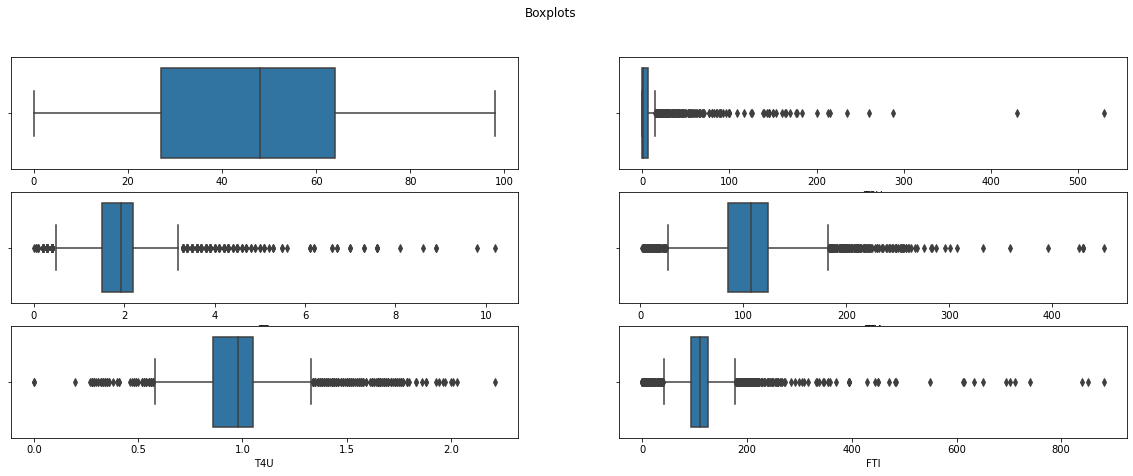

In [18]:
# Checking for outliers 
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6)) = plt.subplots(3,2, figsize=(20, 7))
fig.suptitle('Boxplots')
sns.boxplot(df['age'], ax=ax1)
sns.boxplot(df['TSH'], ax=ax2)
sns.boxplot(df['T3'], ax=ax3)
sns.boxplot(df['TT4'], ax=ax4)
sns.boxplot(df['T4U'], ax=ax5)
sns.boxplot(df['FTI'], ax=ax6)

In [19]:
# Checking for anomalies 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(mask)

FTI                          300
FTI_measured                   0
T3                           257
T3_measured                    0
T4U                          249
T4U_measured                   0
TBG                          260
TBG_measured                   0
TSH                          208
TSH_measured                   0
TT4                          253
TT4_measured                   0
age                            0
goitre                         0
lithium                        0
on_antithyroid_medication      0
on_thyroxine                   0
pregnant                       0
query_hypothyroid              0
query_on_thyroxine             0
sex                            0
sick                           0
status                       151
thyroid_surgery                0
tumor                          0
dtype: int64


In [20]:
# Checking what percentage of the data the anomalies occupy 
percentage = (mask / df.shape[0]) * 100
percentage.sum()

53.05090104331331

## Exploratory Data Analysis 

### Univariate Analysis 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


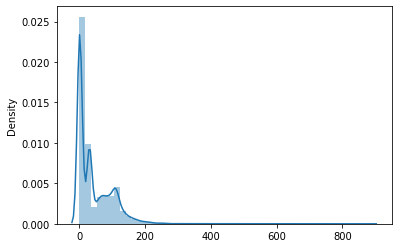

In [21]:
# Getting the distribution of the data 
X = df[['age','TSH','T3','TT4','T4U','FTI','TBG']]
sns.distplot(X)

In [22]:
# Getting the mode of all the columns 
df.mode()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,1,0.0,F,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.939749,y,108.85,y,0.978199,y,115.397771,n,31.283077


In [23]:
# Getting the skewness of the dataset 
print(df.skew())
print(df.skew().sum())

status    -4.244318
age       -0.356590
TSH       11.075279
T3         2.401958
TT4        1.571505
T4U        0.954853
FTI        5.317936
TBG        9.892781
dtype: float64
26.613402751690792


In [24]:
# Getting the kurtosis of the columns 
print(df.kurt())
print(df.kurt().sum())

status     16.024369
age        -0.923346
TSH       180.097308
T3         14.017703
TT4         7.810266
T4U         3.963176
FTI        51.464046
TBG       143.889255
dtype: float64
416.34277543725966


In [25]:
# Getting the summary statistics 
df.describe()

,status,age,TSH,T3,TT4,T4U,FTI,TBG
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,43.941195,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,0.213248,25.235169,22.060029,0.880441,43.657766,0.217513,57.838927,5.502089
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,0.000000,1.500000,85.000000,0.860000,92.000000,31.283077
50%,1.000000,48.000000,1.000000,1.939749,107.000000,0.978199,110.000000,31.283077
75%,1.000000,64.000000,5.923180,2.200000,124.000000,1.050000,126.000000,31.283077
max,1.000000,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


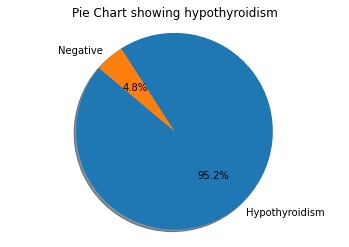

In [26]:
# Plotting to see the amount of hypothyroidism in the dataset 
vals = df['status'].value_counts()
names = ['Hypothyroidism','Negative']
plt.pie(vals, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing hypothyroidism')
plt.show()

In [27]:
# Isolating all the people who have hypothyroidism for further analysis 
select = df[df['status']==1]

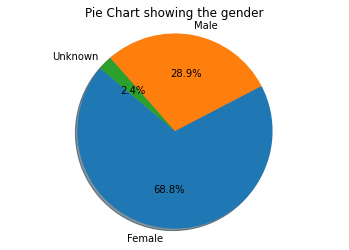

In [28]:
# Getting the different the gender and their respective values for the people who have hypothyroidism 
num = select['sex'].value_counts()
names = ['Female','Male','Unknown']
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing the gender')
plt.show()

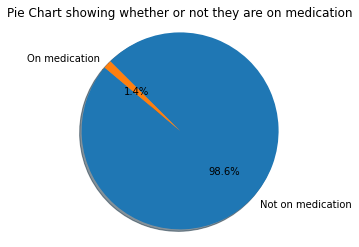

In [29]:
# Getting to see 
num = select['on_antithyroid_medication'].value_counts()
names= ['Not on medication','On medication']
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing whether or not they are on medication')
plt.show()

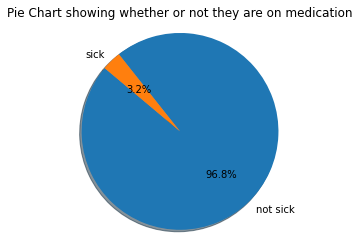

In [30]:
# Getting the proportion of people who are sick 
num = select['sick'].value_counts()
num
names = ['not sick','sick'] 
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing whether or not they are on medication')
plt.show()

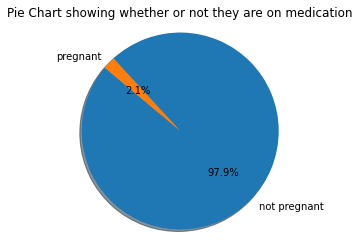

In [31]:
# We would like to see of the proportion that has hypothyroidism how many are pregnant 
num = select['pregnant'].value_counts()
num
names = ['not pregnant','pregnant'] 
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing whether or not they are on medication')
plt.show()

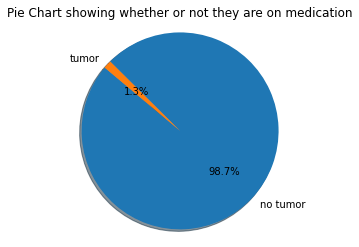

In [32]:
# We would like to see of the ones that have hypothydroidism how many have a tumor 
num = select['tumor'].value_counts()
num
names = ['no tumor','tumor'] 
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing whether or not they are on medication')
plt.show()

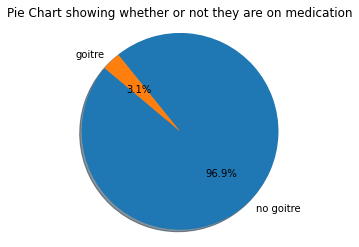

In [33]:
# We would like to see of the ones who have hypothyroidism how many have goitre
num = select['goitre'].value_counts()
num
names = ['no goitre','goitre'] 
plt.pie(num, labels = names, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart showing whether or not they are on medication')
plt.show()

#### Univariate Findings  

By checking the distribution, skewness and kurtosis, we have seen that the dataset has a high number of outliers and this has hence influenced our data, we have also observed there is a heavy tail and the data is positvely skewed. We have also established that majority of the people tested have hypothyroidism. On other analysis we have seen that of all the sick people with hypothyroidism 1.4 % have medication, 3.2 % are sick the rest dont show symptoms of being sick, and 3.1% get goitre. 

### Bivariate Analysis 

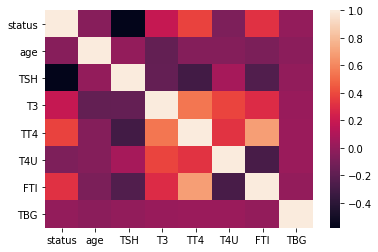

In [34]:
# Getting the correlation of the 
sns.heatmap(df.corr())

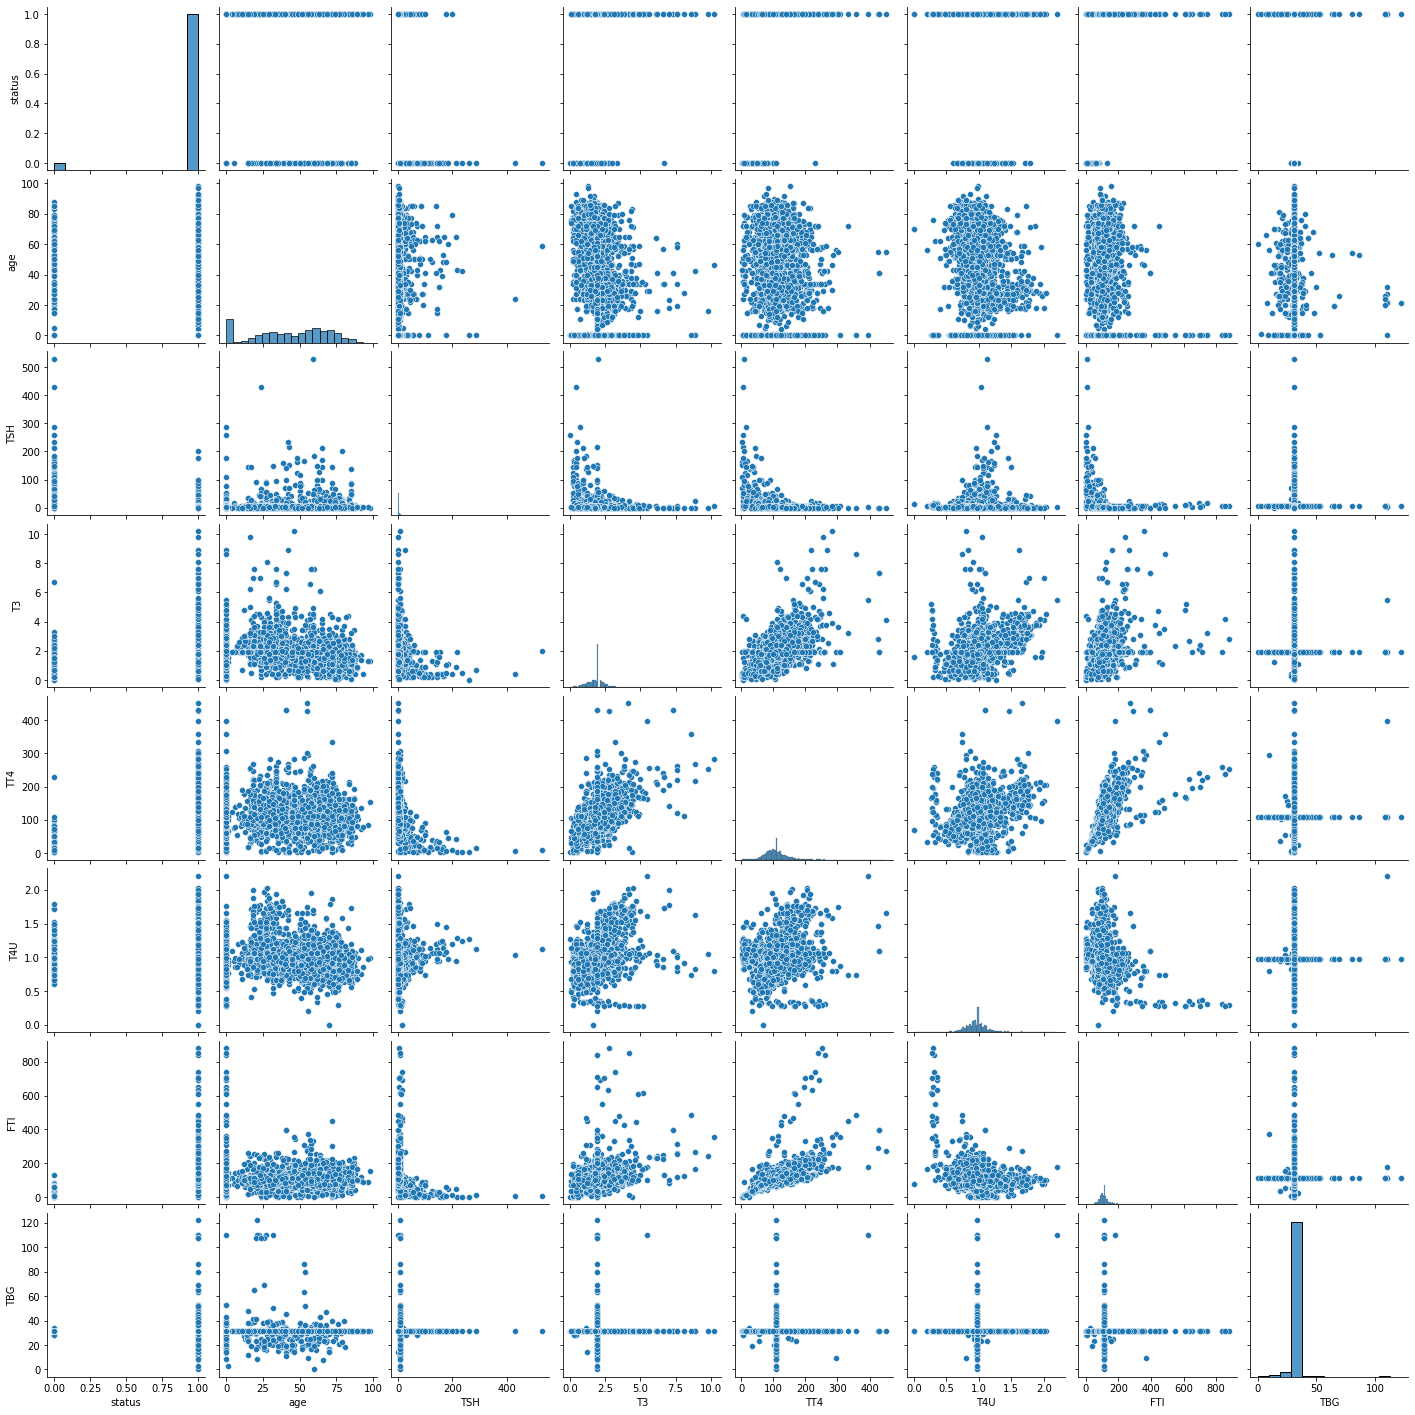

In [35]:
#Getting to see the scatter plots for the correlation to better understand the dataset.
sns.pairplot(df)

## Implementing the soloution 

### Preparing the data 

In [36]:
# Changing the categorical columns to numeric columns to better train our models 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
listt = ['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','pregnant','sick','tumor','lithium','goitre','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
for x in df[listt]:
 df[x]= le.fit_transform(df[x])


In [37]:
# Selecting the features that we intend to use 
from sklearn.model_selection import train_test_split 
test_features = ['age','sex','on_thyroxine','on_antithyroid_medication','pregnant','sick','lithium','goitre','TSH','T3','TT4','T4U','FTI','TBG']
X = df[test_features].values
y = df['status']
# Splitting the data to train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [38]:
# Passing our data through a standard scaler to minimize the influence of the outliers since we have many 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Part 1 : Decision trees  

#### Random forest before boosting

In [39]:
# Since we have a classification problem we use the random forest classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest = forest.fit(X_train, y_train)

In [40]:
# Getting a prediction for the Y_test 
y_pred = forest.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


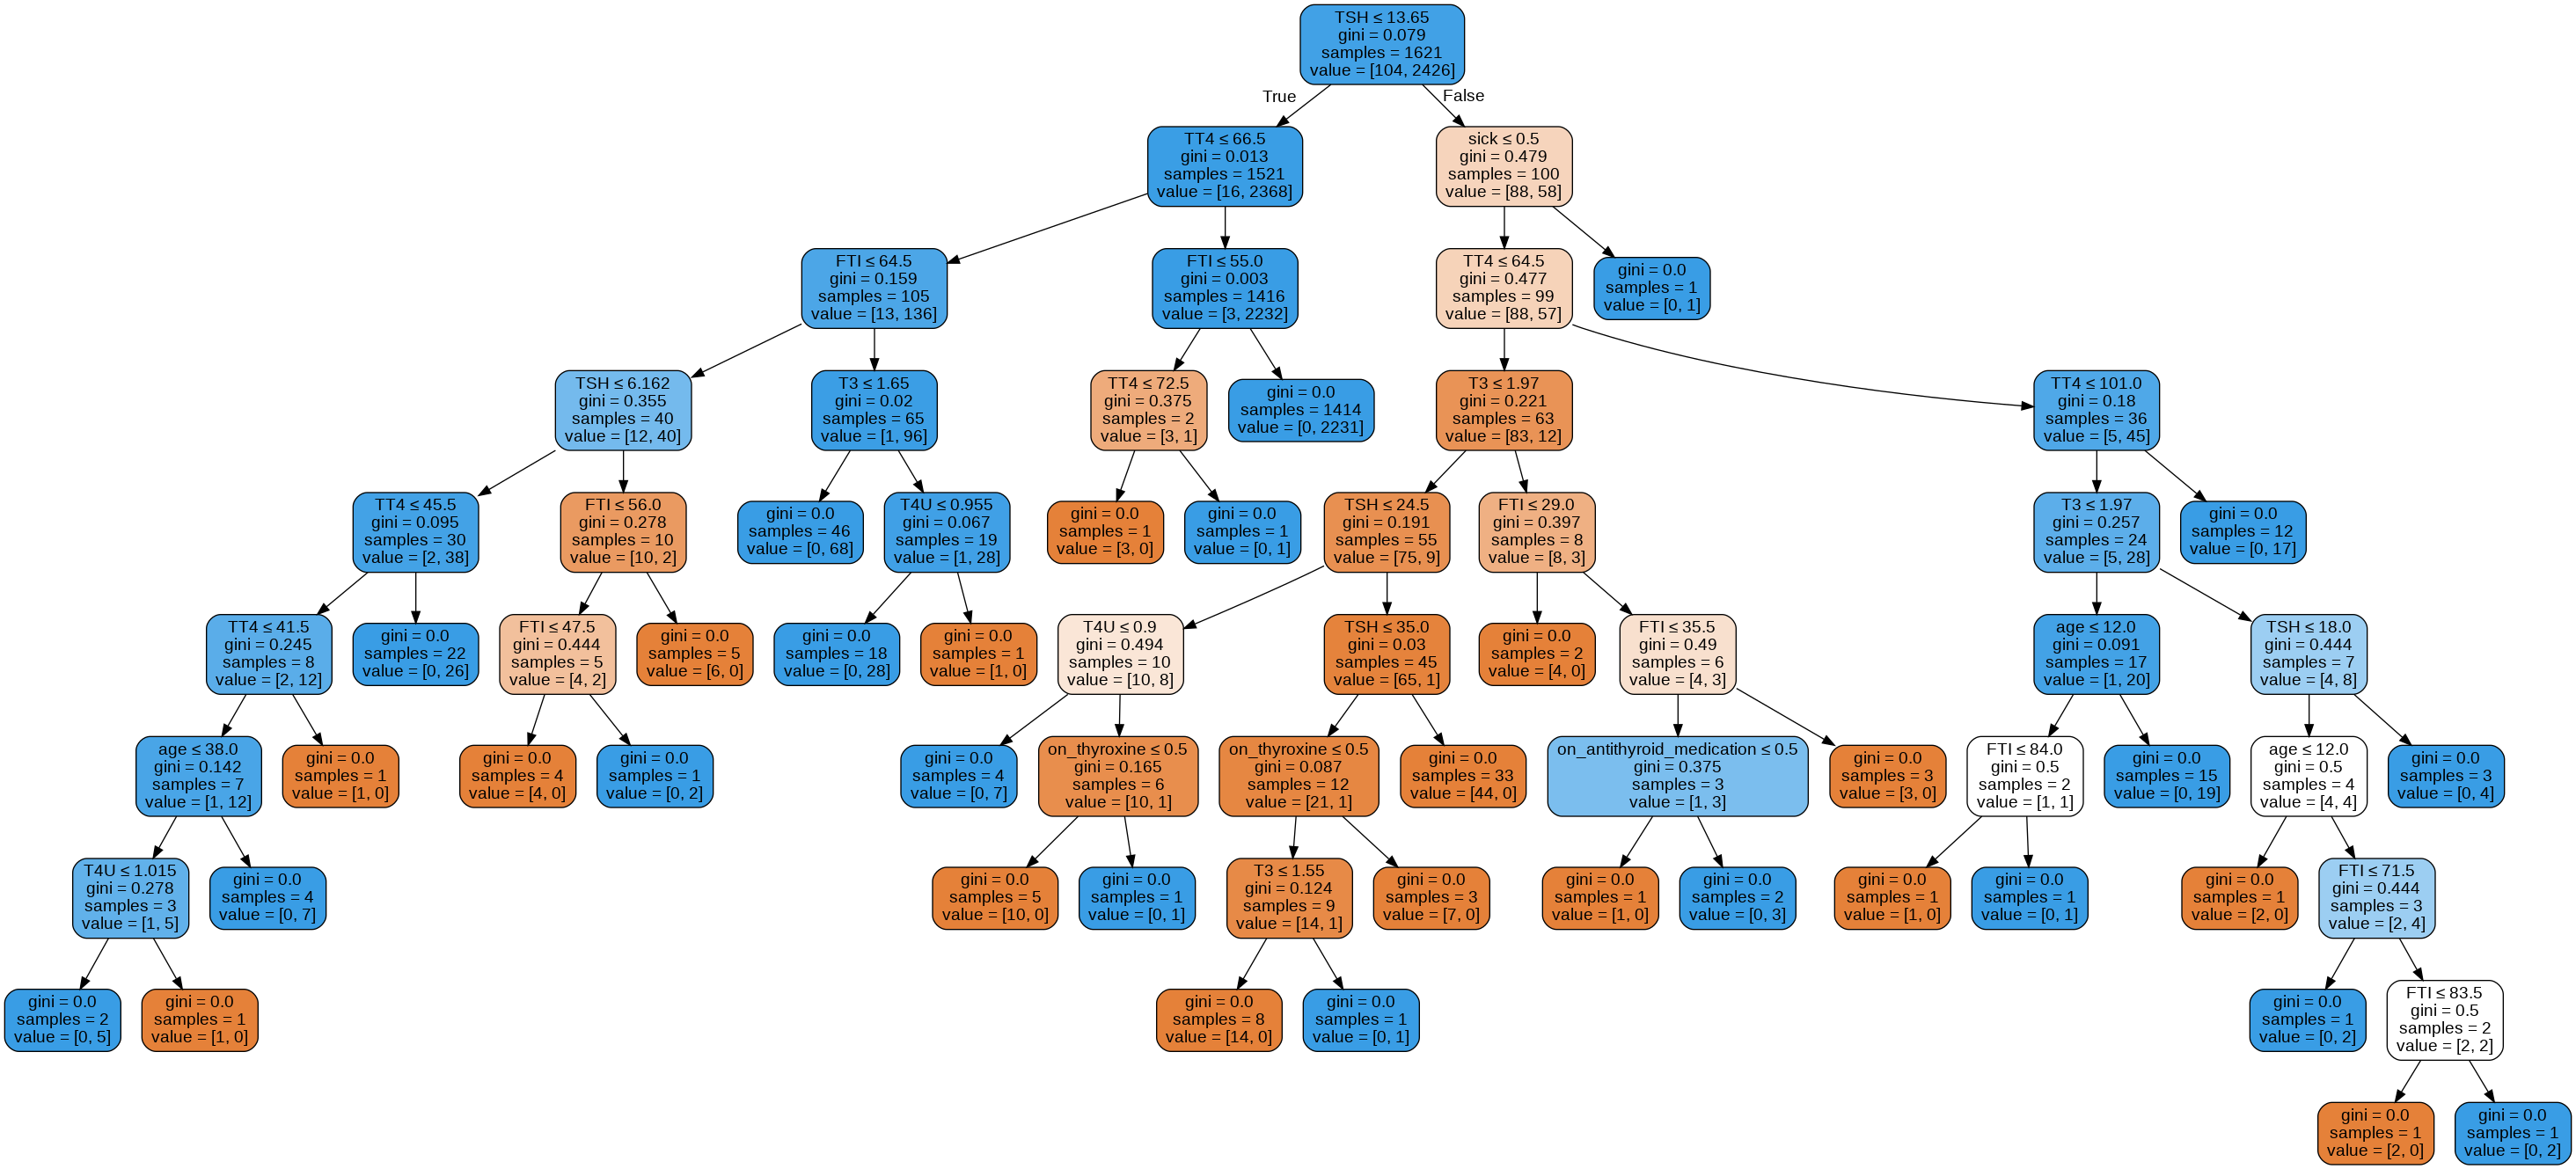

In [41]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# Picking a specific tree from the forest 
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

In [42]:
# Getting the margin of error in our model 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.017377567140600316
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848


#### Hyper parameter tuning 

In [43]:
grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [44]:
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(forest,
                     grid_param,
                     scoring='accuracy',
                     cv=5)



In [45]:
random_sr.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [46]:
best_parameters = random_sr.best_params_
print(best_parameters)


{'n_estimators': 500, 'criterion': 'entropy', 'bootstrap': False}


In [47]:
forest = RandomForestClassifier(bootstrap= False,criterion='entropy',n_estimators=100)
forest = forest.fit(X_train, y_train)

In [48]:
y_pred = forest.predict(X_test)

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01579778830963665
Mean Squared Error: 0.01579778830963665
Root Mean Squared Error: 0.12568925295997527


#### Ada boosting 

In [50]:
# Using the ada boost to get a better result 
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(RandomForestClassifier(bootstrap= False,criterion='entropy',n_estimators=100))

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X)

In [51]:
# Fitting the model into our variables 
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=False,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                   

In [52]:
# Predicting using the ada boost
y_pred_ada = ada_boost.predict(X_test)

In [53]:
# Checking whether the error margin has improved with ada boost
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.017377567140600316
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848


#### Finding the columns that contributed the most 

In [54]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.01), ('sex', 0.0), ('on_thyroxine', 0.01), ('on_antithyroid_medication', 0.01), ('pregnant', 0.0), ('sick', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH', 0.58), ('T3', 0.02), ('TT4', 0.23), ('T4U', 0.05), ('FTI', 0.09), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.58
Variable: TT4                  Importance: 0.23
Variable: FTI                  Importance: 0.09
Variable: T4U                  Importance: 0.05
Variable: T3                   Importance: 0.02
Variable: age                  Importance: 0.01
Variable: on_thyroxine         Importance: 0.01
Variable: on_antithyroid_medication Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TBG                  Importance: 0.0


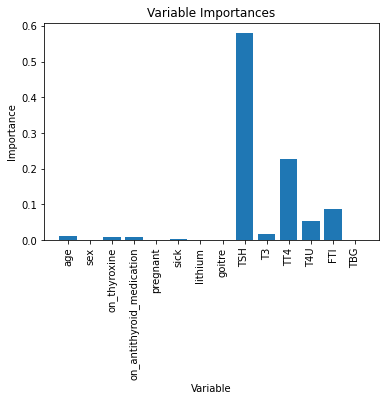

In [55]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Part 2: Support Vector Machines

#### Preparing the data 

In [56]:
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,31.283077
1,0,15.0,0,1,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,31.283077


In [57]:
# From the previous model we noticed that FTI and TSH contributed the most 
# We shall select the features and labels of our model 
X = df[['TSH','FTI']].to_numpy()
y = df['status']

In [58]:
# For visualization purposes 
df1 = df[['FTI','TSH']]
df1.head()

,FTI,TSH
0,10.0,30.0
1,17.0,145.0
2,0.0,0.0
3,6.0,430.0
4,44.0,7.3


In [59]:
# Splitting the data into train and test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
# Scaling our data to reduce the influence of outliers 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X,y)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Linear SVC

In [61]:
# Importing the model 
from sklearn.svm import SVC
model = SVC(kernel= 'linear')

In [62]:
# FItting the model to our variables 
clf_model = model.fit(X_train,y_train)

In [63]:
# Predicting the X_test 
y_pred = model.predict(X_test)

In [64]:
#FInding the margin of error 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.02527646129541864
Mean Squared Error: 0.02527646129541864
Root Mean Squared Error: 0.15898572670343286


#### Polynomical SVC 

In [65]:
# Importing the model 
from sklearn.svm import SVC 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto') 


In [ ]:
# Fitting it into our training data 
polyclassifier.fit(X_train, y_train)

In [ ]:
# Getting the predictions using polynoimial SVC
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Finding the margin of error 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#### RBF SVC 

In [66]:
# Importing out model 
from sklearn.svm import SVC 
rbfclassifier = SVC(kernel='rbf')

In [67]:
# Fitting the rbf classifier into our model 
rbfclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
# Prediction using our rbf classifier 
y_pred = rbfclassifier.predict(X_test)

In [69]:
# Finding the error of margin 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.022116903633491312
Mean Squared Error: 0.022116903633491312
Root Mean Squared Error: 0.14871752967788066


#### Hyper parameter tuning 

In [ ]:
#Listing the parameters we would like to tune 
param_dist = {"kernel": ['rbf','poly','linear'],
              "C": [0.1,1,10,100,1000],
              "gamma" :[1,0.1,0.01,0.001,0.0001]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
random_sr = RandomizedSearchCV(SVC(), param_dist) 


In [ ]:
random_sr.fit(X_train,y_train)

In [ ]:
best_parameters = random_sr.best_params_
print(best_parameters)

#### Using all the components 

In [70]:
# Using PCA to get two components to use in the answer
from sklearn.decomposition import PCA
X = df.drop(['status'],axis=1)
pca = PCA(n_components=2).fit(X)
x = pca.transform(X)
x.shape

(3163, 2)

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [72]:
from sklearn.svm import SVC 
rbfclassifier = SVC(kernel='rbf',gamma='auto')

In [73]:
rbfclassifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [74]:
y_pred = rbfclassifier.predict(X_test)

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.037914691943127965
Mean Squared Error: 0.037914691943127965
Root Mean Squared Error: 0.1947169534044942


### Our findings 

We found that the Random forest with boosting gave the best results. 

### Challenging the soloution 

We would like to challenge our soloution by using gradient boost instead of ada boost to see if we get a better answer. 

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(n_estimators=100)
gbr = gbr.fit(X_train, y_train)

In [77]:
y_pred_gbr = gbr.predict(X_test)

In [78]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))

Mean Absolute Error: 0.017377567140600316
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848


## Our findings 

We have observed that the best method to predict the hypothyroidism is using hypertuned random forests. As it gave us an RMSE of 0.125 where as the rest were greater than this by alot. We also noticed that boosting didnt change anything in our data meaning that the weak learners were not contributing anything to the model. When using the support vector classifier we saw that the rbf kernel gave the best results and using the FTI test and the TSH gave us the best while combined with rbf. Since our randomsearchCV didnt work we couldnt get the best "C" and 'gamma' parameters to use. 

## Follow Up Questions 

### Did we have the right data 

Yes we had the right data because we could predict the status given the columns.

### Do we need other data to answer this question 

### Did we have the right question 